# 📏 Pixel to Centimeter Conversion Guide
Converting **pixels (px)** to **centimeters (cm)** is a straightforward process using a conversion factor based on screen DPI (Dots Per Inch).

---

## 🧩 Step-by-Step Guide
1. **Determine DPI (Dots Per Inch):**  
   Identify the DPI of your display or image.  
   The standard value for most screens is **96 DPI**.

2. **Use the Conversion Formula:**

   $$
   \text{cm} = \frac{\text{px}}{\text{DPI}} \times 2.54
   $$

   Where:
   - **px** = Number of pixels  
   - **DPI** = Dots per inch  
   - **2.54** = Centimeters per inch  

---

## 🧮 Example Calculation
For an image that is **1920 pixels wide** on a **96 DPI** screen:

$$
\text{cm} = \frac{1920}{96} \times 2.54 = 50.8 \, \text{cm}
$$

So, a 1920px wide image corresponds to approximately **50.8 cm**.

---

### 💡 Notes
- This conversion assumes a **fixed DPI**, which may differ between devices and images.  
- For more accurate real-world size detection (e.g., object measurement in computer vision), calibration with a **known reference object** is recommended.


## Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Sobel Edge Detection Method Only

### 📸 Object Edge Detection & Measurement (Sobel + Pixel-to-Centimeter Conversion)
This guide explains how an object in an image can be detected and measured using:
1. **Grayscale conversion**
2. **Gaussian blur**
3. **Sobel edge detection**
4. **Binary thresholding**
* **Contour extraction**
* **Bounding box measurement**
* **Pixel → Centimeter conversion**


###  1. Converting Image to Grayscale
To simplify processing, the image is converted from **RGB** to **grayscale**.
Grayscale removes color information and retains only intensity, making edge detection more effective.


###  2. Reducing Noise Using Gaussian Blur
Before detecting edges, Gaussian blur smooths noise and small artifacts.
This prevents false edges from being detected.


###  3. Detecting Edges Using the Sobel Operator
The Sobel operator computes intensity changes in:

* Horizontal direction
* Vertical direction

These gradients are combined to produce a map of strong edges, representing object boundaries.

Mathematically:

$$
G = \sqrt{G_x^2 + G_y^2}
$$

Where:

* ( G_x ) = horizontal gradient
* ( G_y ) = vertical gradient
* ( G ) = combined edge strength

This highlights significant transitions in pixel intensity, which correspond to object edges.


###  4. Converting Edges to a Binary Mask
To simplify contour detection, the edge map is thresholded into a **binary image** (black & white):

* Pixels above a certain intensity → **white (edge)**
* Other pixels → **black (background)**

This produces a clear structure for contour tracing.


###  5. Extracting Object Contours
Contours represent continuous boundaries of detected shapes.
From all contours found, the **largest contour** is selected because it is most likely the main object.


###  6. Bounding Box Extraction
A bounding box is created around the largest contour.
The bounding box provides:

* Width in pixels ( w )
* Height in pixels ( h )

These pixel values are used for measurement.


###  7. Pixel-to-Centimeter Conversion
A reference object with **known real dimensions** is used to compute the conversion ratio.

Example:
If the real object width is ( W_{\text{cm}} ) and its detected width is ( w_{\text{px}} ):

###  Conversion Ratio
$$
r = \frac{W_{\text{cm}}}{w_{\text{px}}}
$$

Where:

* ( r ) = centimeters per pixel
* ( W_{\text{cm}} ) = real-world width
* ( w_{\text{px}} ) = detected width in pixels

Since height is also available, an average ratio can be used:

$$
r_{\text{avg}} = \frac{1}{2} \left(
\frac{W_{\text{cm}}}{w_{\text{px}}}
+
\frac{H_{\text{cm}}}{h_{\text{px}}}
\right)
$$

Where:

* ( H_{\text{cm}} ) = real-world height
* ( h_{\text{px}} ) = detected height in pixels


###  8. Measuring the Detected Object

Once the ratio ( r_{\text{avg}} ) is known:

$$
W_{\text{detected}} = w_{\text{px}} \times r_{\text{avg}}
$$

$$
H_{\text{detected}} = h_{\text{px}} \times r_{\text{avg}}
$$

Where:

* ( W_{\text{detected}} ) = computed width in cm
* ( H_{\text{detected}} ) = computed height in cm

This produces the real-world physical measurement of the object in the image.


###  9. Visualizing Results Side-by-Side
Two images are displayed:

* **Left:** Edge detection result
* **Right:** Image with bounding box and measurement overlay

This provides a clear visual understanding of both the detected edges and the computed dimensions.


#### 🎉 Summary
This method provides a complete pipeline for:
1. Detecting object boundaries
2. Extracting its contour
3. Measuring its real size
4. Visualizing edge detection and measurement

**Important:**
Accurate measurement depends heavily on:
* Calibration with a known-size reference object
* Consistent camera angle
* Consistent distance between camera and object
* Good lighting and contrast

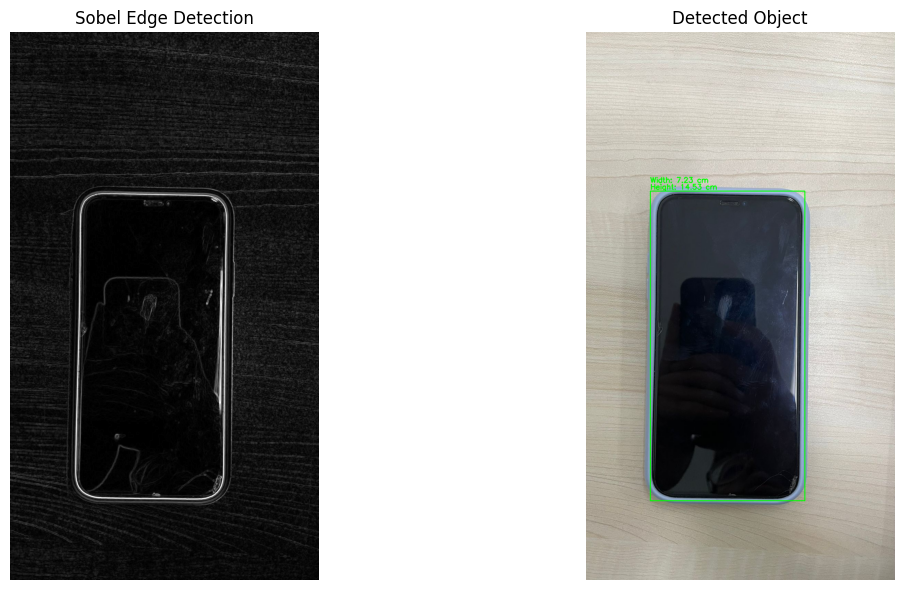

Lebar Objek terdeteksi: 7.23 cm
Tinggi Objek terdeteksi: 14.53 cm
Rasio konversi: 0.0161 cm/pixel


In [3]:
# Fungsi untuk menampilkan gambar side-by-side
def display_comparison(original_img, sobel_img, title1='Sobel Edge Detection', title2='Detected Object'):
    """Display image Edge Detection and Meassurement Detection using matplotlib.pyplot by matrix 1x2"""
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    axs[0].imshow(cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(title1)
    axs[0].axis('off')
    
    axs[1].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title2)
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Membaca gambar
img = cv2.imread('assets/Image6.jpg')

# Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian blur untuk mengurangi noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel edge detection
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Threshold agar lebih kontras
_, thresh = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)

# Cari kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Pastikan kontur ditemukan
if not contours:
    raise ValueError("Tidak ditemukan kontur pada citra objek.")

# Cari kontur terbesar (HP)
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Ukuran sebenarnya (cm)
actual_width_cm = 7.0
actual_height_cm = 15.0

# Hitung rasio cm/pixel
cm_per_pixel_w = actual_width_cm / w
cm_per_pixel_h = actual_height_cm / h
cm_per_pixel_avg = (cm_per_pixel_w + cm_per_pixel_h) / 2

# Konversi ukuran terdeteksi ke cm
detected_width_cm = w * cm_per_pixel_avg
detected_height_cm = h * cm_per_pixel_avg

# Gambar bounding box dan ukuran dalam cm
img_box = img.copy()
cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(img_box, f"Width: {detected_width_cm:.2f} cm", (x, y - 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_box, f"Height: {detected_height_cm:.2f} cm", (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Buat gambar Sobel dalam format 3 channel agar bisa ditampilkan dengan warna
sobel_vis = cv2.merge([sobel_combined, sobel_combined, sobel_combined])

# Tampilkan hasil Sobel dan deteksi bounding box secara berdampingan
display_comparison(img_box, sobel_vis)

# Cetak hasil akhir dalam cm
print(f"Lebar Objek terdeteksi: {detected_width_cm:.2f} cm")
print(f"Tinggi Objek terdeteksi: {detected_height_cm:.2f} cm")
print(f"Rasio konversi: {cm_per_pixel_avg:.4f} cm/pixel")

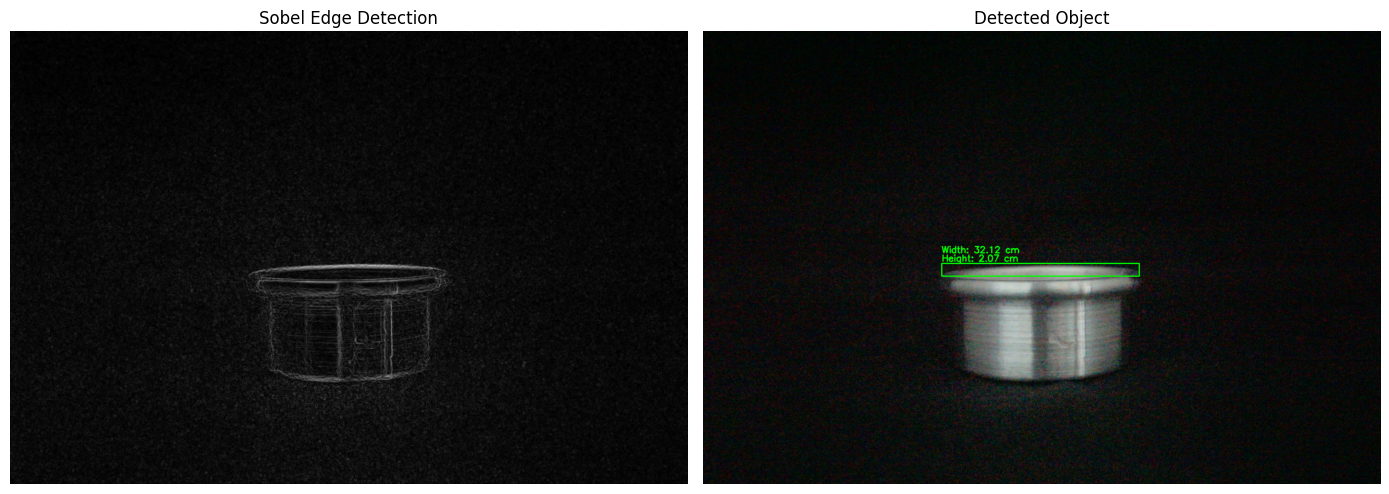

Lebar Objek terdeteksi: 32.12 cm
Tinggi Objek terdeteksi: 2.07 cm
Rasio konversi: 0.0689 cm/pixel


In [4]:
# Fungsi untuk menampilkan gambar side-by-side
def display_comparison(original_img, sobel_img, title1='Sobel Edge Detection', title2='Detected Object'):
    """Display image Edge Detection and Meassurement Detection using matplotlib.pyplot by matrix 1x2"""
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    axs[0].imshow(cv2.cvtColor(sobel_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(title1)
    axs[0].axis('off')
    
    axs[1].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title2)
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Membaca gambar
img = cv2.imread('assets/Image10.jpg')

# Ubah ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian blur untuk mengurangi noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel edge detection
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Threshold agar lebih kontras
_, thresh = cv2.threshold(sobel_combined, 50, 255, cv2.THRESH_BINARY)

# Cari kontur
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Pastikan kontur ditemukan
if not contours:
    raise ValueError("Tidak ditemukan kontur pada citra objek.")

# Cari kontur terbesar (HP)
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Ukuran sebenarnya (cm)
actual_width_cm = 2.1
actual_height_cm = 4.0

# Hitung rasio cm/pixel
cm_per_pixel_w = actual_width_cm / w
cm_per_pixel_h = actual_height_cm / h
cm_per_pixel_avg = (cm_per_pixel_w + cm_per_pixel_h) / 2

# Konversi ukuran terdeteksi ke cm
detected_width_cm = w * cm_per_pixel_avg
detected_height_cm = h * cm_per_pixel_avg

# Gambar bounding box dan ukuran dalam cm
img_box = img.copy()
cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(img_box, f"Width: {detected_width_cm:.2f} cm", (x, y - 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_box, f"Height: {detected_height_cm:.2f} cm", (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Buat gambar Sobel dalam format 3 channel agar bisa ditampilkan dengan warna
sobel_vis = cv2.merge([sobel_combined, sobel_combined, sobel_combined])

# Tampilkan hasil Sobel dan deteksi bounding box secara berdampingan
display_comparison(img_box, sobel_vis)

# Cetak hasil akhir dalam cm
print(f"Lebar Objek terdeteksi: {detected_width_cm:.2f} cm")
print(f"Tinggi Objek terdeteksi: {detected_height_cm:.2f} cm")
print(f"Rasio konversi: {cm_per_pixel_avg:.4f} cm/pixel")

## Object Contrast Adjustment (Third Party App)

### 📸 Object Edge Detection & Measurement Using Adaptive Threshold + Canny
This section explains the complete pipeline used to detect an object from an image and estimate its real-world dimensions using adaptive thresholding, Canny edge detection, contour extraction, and pixel-to-centimeter conversion.


### 1. Image Loading and Grayscale Conversion
The first step is to load the image and convert it into **grayscale**.
Grayscale simplifies the image by removing color information and retaining only intensity values.
This makes edge detection more consistent and computationally efficient.


### 2. Noise Reduction Using Gaussian Blur
Noise is removed by applying a Gaussian blur filter.
This smoothing step reduces small variations in pixel intensity that may produce false edges.

Gaussian blur helps ensure that only major boundaries and object structures influence the edge detection stages.


### 3. Adaptive Thresholding for Local Contrast Enhancement
Adaptive thresholding creates a **binary image** where:

* The object becomes white
* The background becomes black

Unlike a fixed threshold, adaptive thresholding determines the threshold **locally** for each region of the image.

This is useful when lighting is uneven, because the method adapts to shadows and highlights automatically.


### 4. Morphological Closing
Morphological closing is applied to:

* Fill small gaps in the thresholded edges
* Remove small holes
* Produce more continuous, solid object regions

This improves the reliability of contour extraction.


### 5. Canny Edge Detection
Canny edge detection is used to extract clean, thin edges from the morphological output.

Canny has two thresholds to distinguish between strong and weak edges, allowing it to detect object boundaries while ignoring noise.


### 6. Contour Detection
Contours represent continuous curves along detected edges.
Among all contours found, the contour with the **largest area** is selected, assuming it corresponds to the main object in the image.

This contour is used to compute the bounding rectangle.


### 7. Pixel Measurement From Bounding Box
A bounding rectangle is drawn around the largest contour.
From this rectangle, the following pixel measurements are obtained:

* Width in pixels:
  $$ w_{\text{px}} $$
* Height in pixels:
  $$ h_{\text{px}} $$

These pixel values form the basis of the real-world size estimation.


### 8. Pixel-to-Centimeter Conversion
To convert pixel measurements into real-world centimeters, a reference object with **known physical dimensions** is used.

If the reference object has real width ( W_{\text{cm}} ) and height ( H_{\text{cm}} ), the pixel-to-centimeter ratios are:

* Width-based ratio
  $$
  r_w = \frac{W_{\text{cm}}}{w_{\text{px}}}
  $$

* Height-based ratio
  $$
  r_h = \frac{H_{\text{cm}}}{h_{\text{px}}}
  $$

To stabilize the measurement, the average of both ratios is used:

$$
r_{\text{avg}} = \frac{r_w + r_h}{2}
$$


### 9. Final Real-World Measurement
Using the conversion ratio, the detected object’s measurements are:

* **Detected width**
  $$
  W_{\text{detected}} = w_{\text{px}} \times r_{\text{avg}}
  $$

* **Detected height**
  $$
  H_{\text{detected}} = h_{\text{px}} \times r_{\text{avg}}
  $$

These values represent the real-world size of the object based on the detected pixels.


### 10. Visualization
Two images are displayed side-by-side:

* **Left:** Canny edge detection output
* **Right:** Original image with bounding box and measurement labels

This format helps verify that the detected contour and bounding box match the actual object.


### ✅ Summary

This pipeline performs:
1. Local thresholding for contrast enhancement
2. Morphological operations for edge strengthening
3. Canny edge extraction
4. Contour detection to isolate the object
5. Bounding box size measurement
6. Pixel-to-centimeter conversion using a reference object
7. Side-by-side visualization

The accuracy of measurement depends on:
* Image quality
* Contrast between object and background
* Calibration with reliable reference dimensions
* Consistent camera distance and angle

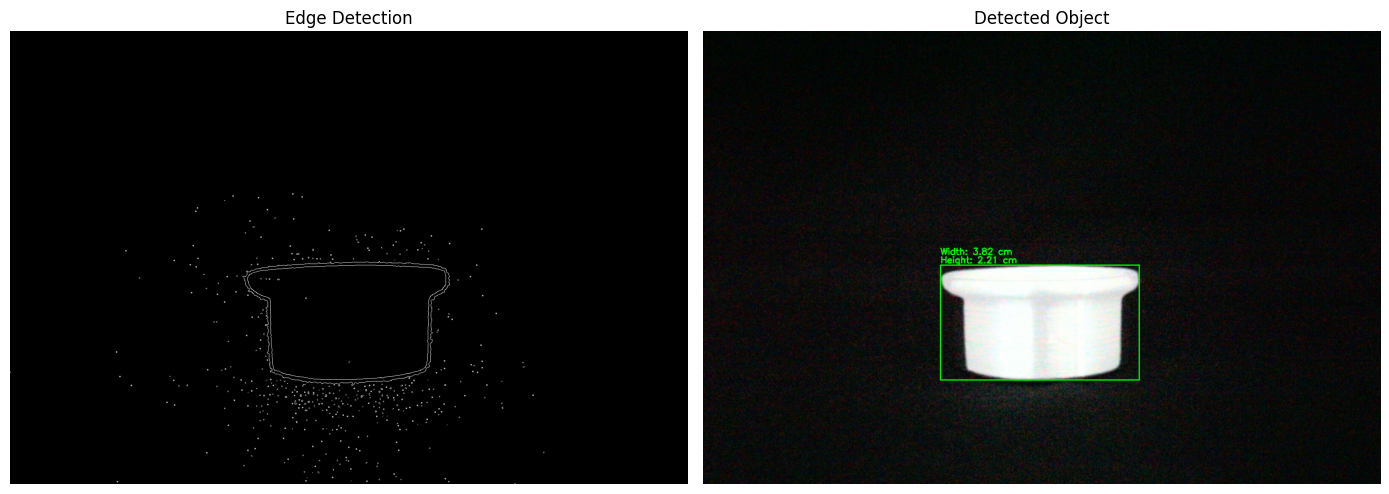

Lebar objek terdeteksi: 3.82 cm
Tinggi objek terdeteksi: 2.21 cm
Rasio konversi: 0.0081 cm/pixel


In [5]:
# Fungsi untuk menampilkan gambar side-by-side
def display_comparison(original_img, edge_img, title1='Edge Detection', title2='Detected Object'):
    """Display image Edge Detection and Meassurement Detection using matplotlib.pyplot by matrix 1x2"""
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    axs[0].imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(title1)
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title2)
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()

# === Membaca gambar ===
img = cv2.imread('assets/Image11.jpg')

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Hilangkan noise
blur = cv2.GaussianBlur(gray, (7, 7), 0)

# Adaptive threshold untuk memperjelas kontras
thresh_adapt = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV, 15, 5)

# Gunakan morfologi untuk menutup celah kecil pada tepi
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh_adapt, cv2.MORPH_CLOSE, kernel, iterations=2)

# Canny edge detection
edges = cv2.Canny(morph, 50, 150)

# Cari kontur terbesar (diasumsikan objek utama)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if not contours:
    raise ValueError("Tidak ditemukan kontur pada citra objek.")
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Ukuran sebenarnya (dari HP untuk kalibrasi)
actual_width_cm = 4
actual_height_cm = 2.1

# Hitung rasio cm/pixel (gunakan data HP sebelumnya)
cm_per_pixel_w = actual_width_cm / w
cm_per_pixel_h = actual_height_cm / h
cm_per_pixel_avg = (cm_per_pixel_w + cm_per_pixel_h) / 2

# Konversi hasil deteksi ke cm
detected_width_cm = w * cm_per_pixel_avg
detected_height_cm = h * cm_per_pixel_avg

# Gambar bounding box
img_box = img.copy()
cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(img_box, f"Width: {detected_width_cm:.2f} cm", (x, y - 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_box, f"Height: {detected_height_cm:.2f} cm", (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Buat citra edge detection 3-channel
edges_vis = cv2.merge([edges, edges, edges])

# Tampilkan hasil berdampingan
display_comparison(img_box, edges_vis)

# Cetak hasil
print(f"Lebar objek terdeteksi: {detected_width_cm:.2f} cm")
print(f"Tinggi objek terdeteksi: {detected_height_cm:.2f} cm")
print(f"Rasio konversi: {cm_per_pixel_avg:.4f} cm/pixel")

## Object Contrast Adjustment (Directly)

### 📸 Object Edge Detection & Measurement Using Canva-Style Editing + Sobel
This section explains the full pipeline used to detect an object after applying Canva-style brightness/contrast adjustments, extract its contour, and estimate real-world dimensions using Sobel edge detection and pixel-to-centimeter conversion.


### 1. Image Loading and Grayscale Conversion
The image is first loaded and converted into **grayscale**.
Grayscale simplifies the image by removing color information and keeping only brightness intensity, which is essential for gradient-based edge detection such as Sobel.


### 2. Object Selection Mask
A binary mask is created to isolate **bright regions** of the object.
Pixels above a chosen threshold become white; others become black.

This mask allows the brightness/contrast adjustments to be applied **only to the object**, just like selecting an object in Canva before editing.


### 3. Canva-Style Brightness and Contrast Adjustment
The selected object undergoes artificial image enhancement similar to Canva:

* **Brightness increased**
* **Contrast flattened**
* **Highlights strengthened**

These adjustments improve edge visibility by making the object brighter and the background relatively darker.

The transformation can be expressed as:

* Brightness shift
  $$
  I' = I + B
  $$
* Contrast reduction
  $$
  I'' = \alpha I' + \beta
  $$

where:

* ( B ) increases brightness
* ( \alpha < 1 ) reduces contrast
* ( \beta ) shifts brightness midpoint

Only pixels within the mask are modified.


### 4. Edge Detection Pipeline
The modified image is converted back to grayscale and processed using:

1. **Gaussian blur** to remove noise
2. **Sobel operators** in X and Y directions
3. **Magnitude combination** of both gradients
4. **Otsu thresholding** for automatic binarization
5. **Morphological closing** to connect broken edge segments

Sobel magnitude:

$$
G = \sqrt{G_x^2 + G_y^2}
$$

Otsu thresholding automatically selects the best cutoff between object and background.


### 5. Contour Extraction
Contours are extracted from the processed binary edge map.
The contour with the **largest area** is assumed to represent the main object.

This contour is then used to compute a **bounding rectangle**, yielding:

* Width in pixels:
  $$
  w_{\text{px}}
  $$
* Height in pixels:
  $$
  h_{\text{px}}
  $$


### 6. Pixel-to-Centimeter Conversion
Real-world dimensions require a known reference measurement from a calibration object.

Given reference width ( W_{\text{cm}} ) and height ( H_{\text{cm}} ):

* Width conversion ratio
  $$
  r_w = \frac{W_{\text{cm}}}{w_{\text{px}}}
  $$
* Height conversion ratio
  $$
  r_h = \frac{H_{\text{cm}}}{h_{\text{px}}}
  $$

To reduce measurement noise, the two ratios are averaged:

$$
r_{\text{avg}} = \frac{r_w + r_h}{2}
$$


### 7. Final Real-World Measurement
Using the conversion ratio, pixel size is converted into centimeters:

* **Detected width**
  $$
  W_{\text{detected}} = w_{\text{px}} \times r_{\text{avg}}
  $$

* **Detected height**
  $$
  H_{\text{detected}} = h_{\text{px}} \times r_{\text{avg}}
  $$

These values provide the estimated physical dimensions of the detected object.


### 8. Visualization
Two images are shown side-by-side:

* **Left:** Edge detection output after Sobel + thresholding
* **Right:** Original image with bounding box and measurement labels

This helps verify the accuracy of both the contour extraction and the final measurement.


### ✅ Summary
This pipeline includes:
1. Object selection through brightness masking
2. Canva-style contrast and brightness editing
3. Gaussian blur for noise reduction
4. Sobel edge detection
5. Otsu thresholding for automatic segmentation
6. Morphological closing for edge continuity
7. Largest contour extraction
8. Bounding box measurement
9. Pixel-to-centimeter conversion
10. Visualization of detection and measurement

Accuracy depends on:
* Quality and clarity of the image
* Strength of edges after editing
* Proper contour extraction
* Reliable reference dimensions for calibration

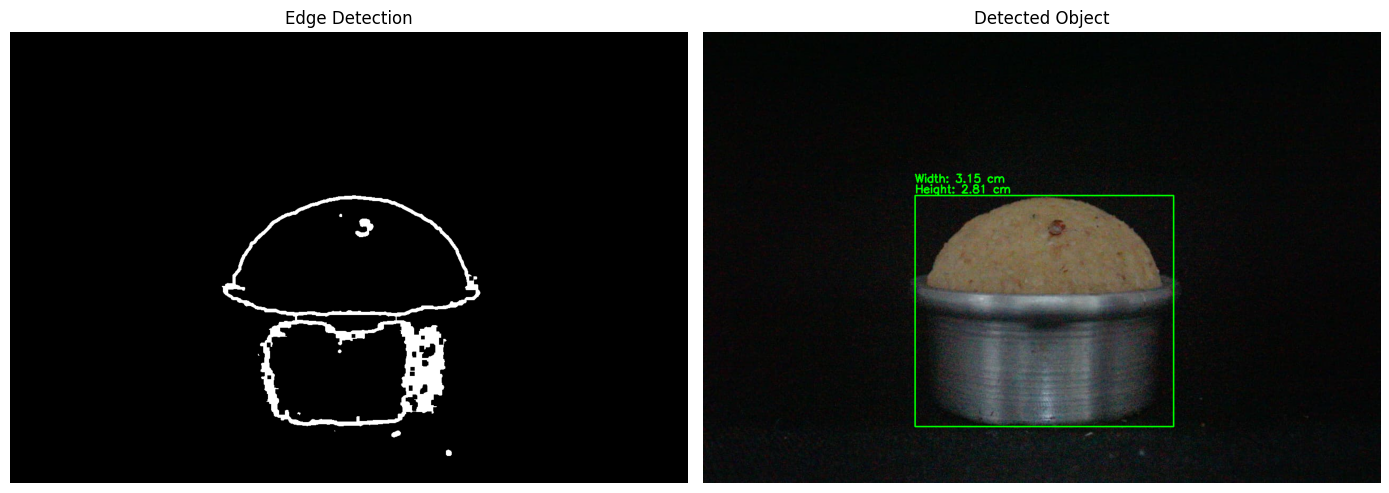

Lebar objek terdeteksi: 3.15 cm
Tinggi objek terdeteksi: 2.81 cm
Rasio konversi: 0.0064 cm/pixel


In [45]:
def display_comparison(original_img, edge_img, title1='Edge Detection', title2='Detected Object'):
    """Display image Edge Detection and Meassurement Detection using matplotlib.pyplot by matrix 1x2"""
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    axs[0].imshow(cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(title1)
    axs[0].axis('off')
    
    axs[1].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axs[1].set_title(title2)
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()


# 1) LOAD IMAGE

img = cv2.imread('assets/Image9.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 2) OBJECT SELECTION MASK (bright areas)

_, obj_mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)


# 3) OBJECT ADJUSTMENTS

edited = img.astype(np.float32)
# Brightness +100
edited += 100
# Contrast -100  (flatten)
edited = edited * 0.5 + 64
# Clamp to valid range
edited = np.clip(edited, 0, 255).astype(np.uint8)
# Apply only to object
edited_obj = img.copy()
edited_obj[obj_mask == 255] = edited[obj_mask == 255]


# 4) EDGE DETECTION PIPELINE
gray2 = cv2.cvtColor(edited_obj, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray2, (9, 9), 0)
sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)
sobel = cv2.convertScaleAbs(sobel)
# Automatic threshold (OTSU)
_, thresh = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Close gaps
kernel = np.ones((7, 7), np.uint8)
thresh_closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)


# 5) FIND CONTOUR OF OBJECT
contours, _ = cv2.findContours(thresh_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    raise ValueError("Tidak ditemukan kontur pada objek.")

largest_contour = max(contours, key=cv2.contourArea)

x, y, w, h = cv2.boundingRect(largest_contour)


# 6) MEASUREMENT (CM) - Real Meassure References for Scaling Calibration
actual_width_cm = 3.94
actual_height_cm = 2.1
# Hitung rasio cm/pixel
cm_per_pixel_w = actual_width_cm / w
cm_per_pixel_h = actual_height_cm / h
cm_per_pixel_avg = (cm_per_pixel_w + cm_per_pixel_h) / 2
# Konversi ukuran terdeteksi ke cm
detected_width_cm = w * cm_per_pixel_avg
detected_height_cm = h * cm_per_pixel_avg
# Gambar bounding box dan ukuran dalam cm
img_box = img.copy()
cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.putText(img_box, f"Width: {detected_width_cm:.2f} cm", (x, y - 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.putText(img_box, f"Height: {detected_height_cm:.2f} cm", (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
# Prepare edge image for display
edges_vis = cv2.merge([thresh_closed, thresh_closed, thresh_closed])

# 8) DISPLAY SIDE-BY-SIDE
display_comparison(img_box, edges_vis)

# 9) PRINT RESULTS
print(f"Lebar objek terdeteksi: {detected_width_cm:.2f} cm")
print(f"Tinggi objek terdeteksi: {detected_height_cm:.2f} cm")
print(f"Rasio konversi: {cm_per_pixel_avg:.4f} cm/pixel")